## CONFORMITY ~ QDIFFCAT + ABILITY
## ALL QUESTIONS


## But Mariginally Less Conformity with the Uncertain Robot 


            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  CONFORMITY
No. Observations:    139      Method:              REML      
No. Groups:          39       Scale:               0.1078    
Min. group size:     1        Log-Likelihood:      -57.5863  
Max. group size:     6        Converged:           Yes       
Mean group size:     3.6                                     
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.941    0.067 14.152 0.000  0.811  1.072
QDIFFCAT[T.EASY]   -0.174    0.075 -2.321 0.020 -0.321 -0.027
QDIFFCAT[T.MEDIUM] -0.100    0.071 -1.402 0.161 -0.240  0.040
ABILITY            -0.070    0.412 -0.170 0.865 -0.878  0.738
Group Var           0.024    0.046                           



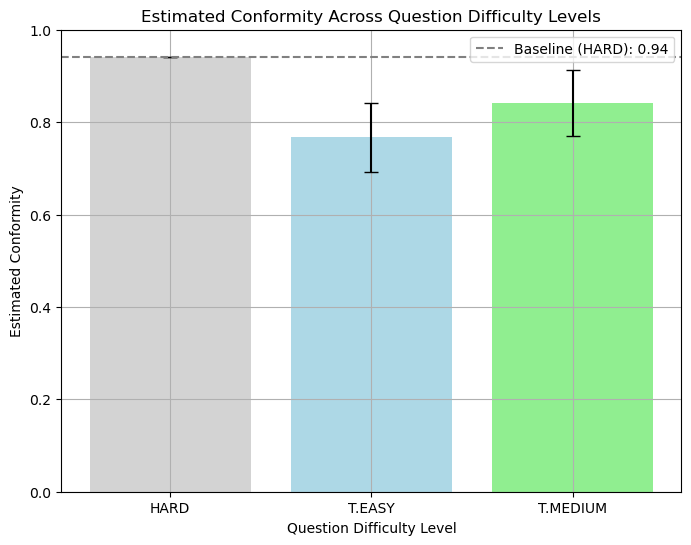

In [40]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Observed Conformity": "CONFORMITY",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "IsCritical": "ISDECEPTION",
    "QDifficultyClass": "QDIFFCAT" # Assuming this is the category variable
})

# Filter data for all dissent cases
dissent_df = df[(df['QUESTION'].isin([1,2,3,4,5,6,7,8])) & (df['DISSENT'] == 1)]

# Fit the Mixed Linear Model with QDIFFCAT and ABILITY
model = mixedlm("CONFORMITY ~ QDIFFCAT + ABILITY", 
                dissent_df, 
                groups=dissent_df["SUBJECT"],
                re_formula="~1")

# Fit the model
result = model.fit()

# Print the summary of the model
print(result.summary())



# Extract the coefficients for plotting
coefs = result.params.filter(like="QDIFFCAT")

# Prepare data for plotting
levels = ['HARD'] + [level.split('[')[1].split(']')[0] for level in coefs.index]
means = [result.params['Intercept']] + [result.params['Intercept'] + coef for coef in coefs]
errors = [0] + list(result.bse.filter(like="QDIFFCAT"))

# Plot the estimated means with error bars
plt.figure(figsize=(8, 6))
plt.bar(levels, means, yerr=errors, color=['lightgray', 'lightblue', 'lightgreen'], capsize=5)
plt.xlabel('Question Difficulty Level')
plt.ylabel('Estimated Conformity')
plt.title('Estimated Conformity Across Question Difficulty Levels')
plt.grid(True)
plt.ylim(0, 1)
plt.axhline(result.params['Intercept'], color='gray', linestyle='--', label=f'Baseline (HARD): {result.params["Intercept"]:.2f}')
plt.legend()
plt.show()


## CONFORMITY ~ QDIFFICULTY (REGRESSION)
## ALL QUESTIONS


In [4]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Observed Conformity": "CONFORMITY",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4"
})

# Filter data for dissent cases
dissent_df = df[(df['QUESTION'].isin([1,2,3,4,5,6,7,8])) & (df['DISSENT'] == 1)]

# Define the independent variable (QDIFFICULTY) and the dependent variable (CONFORMITY)
X = dissent_df['QDIFFICULTY']
y = dissent_df['CONFORMITY']

# Add a constant to the independent variable (for the intercept term)
X = sm.add_constant(X)

# Create and fit the regression model
regression_model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(regression_model.summary())


                            OLS Regression Results                            
Dep. Variable:             CONFORMITY   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.087
Date:                Thu, 26 Sep 2024   Prob (F-statistic):             0.0257
Time:                        18:23:06   Log-Likelihood:                -54.605
No. Observations:                 139   AIC:                             113.2
Df Residuals:                     137   BIC:                             119.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6065      0.109      5.581      

# Plotting both

## CONFORMITY ~ QDIFFICULTY (REGRESSION)
## CONFORMITY ~ QDIFFCAT + ABILITY
## ALL QUESTIONS

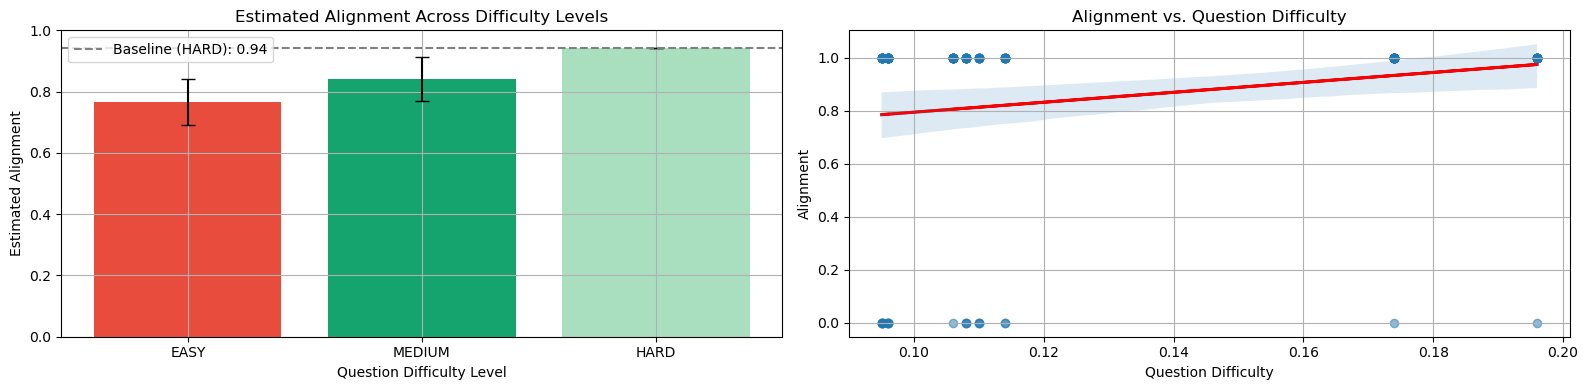

In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Observed Conformity": "CONFORMITY",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "QDifficultyClass": "QDIFFCAT" # Assuming this is the category variable
})

# Filter data for all dissent cases
dissent_df = df[(df['QUESTION'].isin([1,2,3,4,5,6,7,8])) & (df['DISSENT'] == 1)]

# Fit the Mixed Linear Model with QDIFFCAT and ABILITY
model = mixedlm("CONFORMITY ~ QDIFFCAT + ABILITY", 
                dissent_df, 
                groups=dissent_df["SUBJECT"],
                re_formula="~1")

# Fit the model
result = model.fit()

# Extract the coefficients for plotting
coefs = result.params.filter(like="QDIFFCAT")

# Prepare data for plotting
levels = ['EASY', 'MEDIUM', 'HARD']  # Order the difficulty levels as required
means = [result.params['Intercept'] + coefs['QDIFFCAT[T.EASY]'], 
         result.params['Intercept'] + coefs['QDIFFCAT[T.MEDIUM]'], 
         result.params['Intercept']]
errors = [result.bse['QDIFFCAT[T.EASY]'], 
          result.bse['QDIFFCAT[T.MEDIUM]'], 
          0]  # No error bar for intercept as it's the baseline

# Linear Regression for Conformity vs. QDIFFICULTY
X = dissent_df['QDIFFICULTY']
y = dissent_df['CONFORMITY']
X_const = sm.add_constant(X)  # Add a constant for the intercept term
regression_model = sm.OLS(y, X_const).fit()

# Create figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Subplot 1: Bar Plot for Categorical Difficulty Levels
ax[0].bar(levels, means, yerr=errors, color=['#E74C3C', '#16A46E', '#A9DFBF'], capsize=5)
ax[0].set_xlabel('Question Difficulty Level')
ax[0].set_ylabel('Estimated Alignment')
ax[0].set_title('Estimated Alignment Across Difficulty Levels')
ax[0].grid(True)
ax[0].set_ylim(0, 1)
ax[0].axhline(result.params['Intercept'], color='gray', linestyle='--', label=f'Baseline (HARD): {result.params["Intercept"]:.2f}')
ax[0].legend()

# Subplot 2: Regression Plot for Numeric Difficulty
sns.regplot(x='QDIFFICULTY', y='CONFORMITY', data=dissent_df, ax=ax[1], scatter_kws={'alpha':0.5})
ax[1].plot(X, regression_model.predict(X_const), color='red', linewidth=2)
ax[1].set_xlabel('Question Difficulty')
ax[1].set_ylabel('Alignment')
ax[1].set_title('Alignment vs. Question Difficulty')
ax[1].grid(True)

# Show the combined plots
plt.tight_layout()
plt.show()


# CONFORMITY - QDIFFICULTY + IsDeception + ABILITY + CONDITION

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   CONFORMITY
No. Observations:   139       Method:               REML      
No. Groups:         39        Scale:                0.1048    
Min. group size:    1         Log-Likelihood:       -56.4568  
Max. group size:    6         Converged:            Yes       
Mean group size:    3.6                                       
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.754    0.149  5.050 0.000  0.461  1.047
ISDECEPTION[T.True] -0.048    0.076 -0.638 0.523 -0.197  0.100
CONDITION[T.N]      -0.084    0.100 -0.844 0.398 -0.280  0.111
CONDITION[T.U]      -0.129    0.070 -1.844 0.065 -0.265  0.008
QDIFFICULTY          1.455    0.940  1.547 0.122 -0.388  3.299
ABILITY             -0.155    0.475 -0.326 0.744 -1.086  0.777
Group

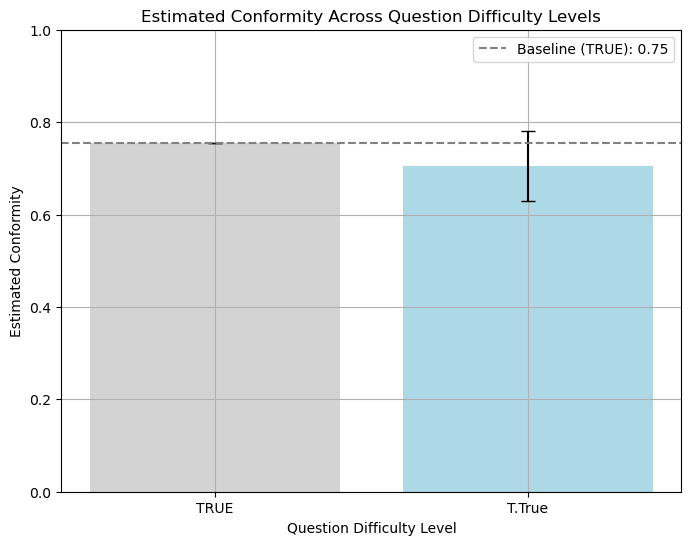

In [42]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Observed Conformity": "CONFORMITY",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "IsCritical": "ISDECEPTION",
    "QDifficultyClass": "QDIFFCAT" # Assuming this is the category variable
})

# Filter data for all dissent cases
dissent_df = df[(df['QUESTION'].isin([1,2,3,4,5,6,7,8])) & (df['DISSENT'] == 1)]

# Fit the Mixed Linear Model with QDIFFCAT and ABILITY
model = mixedlm("CONFORMITY ~ QDIFFICULTY + ISDECEPTION + ABILITY + CONDITION", 
                dissent_df, 
                groups=dissent_df["SUBJECT"],
                re_formula="~1")

# Fit the model
result = model.fit()

# Print the summary of the model
print(result.summary())



# Extract the coefficients for plotting
coefs = result.params.filter(like="ISDECEPTION")

# Prepare data for plotting
levels = ['TRUE'] + [level.split('[')[1].split(']')[0] for level in coefs.index]
means = [result.params['Intercept']] + [result.params['Intercept'] + coef for coef in coefs]
errors = [0] + list(result.bse.filter(like="ISDECEPTION"))

# Plot the estimated means with error bars
plt.figure(figsize=(8, 6))
plt.bar(levels, means, yerr=errors, color=['lightgray', 'lightblue', 'lightgreen'], capsize=5)
plt.xlabel('Question Difficulty Level')
plt.ylabel('Estimated Conformity')
plt.title('Estimated Conformity Across Question Difficulty Levels')
plt.grid(True)
plt.ylim(0, 1)
plt.axhline(result.params['Intercept'], color='gray', linestyle='--', label=f'Baseline (TRUE): {result.params["Intercept"]:.2f}')
plt.legend()
plt.show()


# CONFORMITY - IsDeception + QDIFFICULTY + ABILITY + CONDITION

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   CONFORMITY
No. Observations:   139       Method:               REML      
No. Groups:         39        Scale:                0.1048    
Min. group size:    1         Log-Likelihood:       -56.4568  
Max. group size:    6         Converged:            Yes       
Mean group size:    3.6                                       
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.754    0.149  5.050 0.000  0.461  1.047
ISDECEPTION[T.True] -0.048    0.076 -0.638 0.523 -0.197  0.100
CONDITION[T.N]      -0.084    0.100 -0.844 0.398 -0.280  0.111
CONDITION[T.U]      -0.129    0.070 -1.844 0.065 -0.265  0.008
QDIFFICULTY          1.455    0.940  1.547 0.122 -0.388  3.299
ABILITY             -0.155    0.475 -0.326 0.744 -1.086  0.777
Group

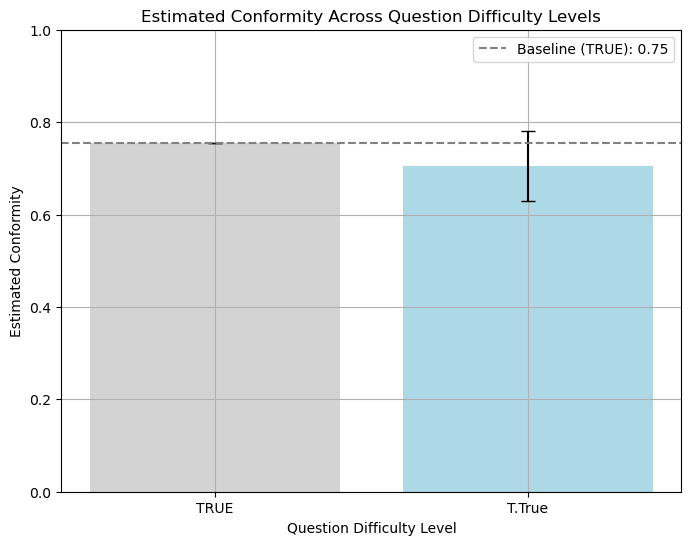

In [43]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Observed Conformity": "CONFORMITY",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "IsCritical": "ISDECEPTION",
    "QDifficultyClass": "QDIFFCAT" # Assuming this is the category variable
})

# Filter data for all dissent cases
dissent_df = df[(df['QUESTION'].isin([1,2,3,4,5,6,7,8])) & (df['DISSENT'] == 1)]

# Fit the Mixed Linear Model with QDIFFCAT and ABILITY
model = mixedlm("CONFORMITY ~ ISDECEPTION + QDIFFICULTY + ABILITY + CONDITION", 
                dissent_df, 
                groups=dissent_df["SUBJECT"],
                re_formula="~1")

# Fit the model
result = model.fit()

# Print the summary of the model
print(result.summary())



# Extract the coefficients for plotting
coefs = result.params.filter(like="ISDECEPTION")

# Prepare data for plotting
levels = ['TRUE'] + [level.split('[')[1].split(']')[0] for level in coefs.index]
means = [result.params['Intercept']] + [result.params['Intercept'] + coef for coef in coefs]
errors = [0] + list(result.bse.filter(like="ISDECEPTION"))

# Plot the estimated means with error bars
plt.figure(figsize=(8, 6))
plt.bar(levels, means, yerr=errors, color=['lightgray', 'lightblue', 'lightgreen'], capsize=5)
plt.xlabel('Question Difficulty Level')
plt.ylabel('Estimated Conformity')
plt.title('Estimated Conformity Across Question Difficulty Levels')
plt.grid(True)
plt.ylim(0, 1)
plt.axhline(result.params['Intercept'], color='gray', linestyle='--', label=f'Baseline (TRUE): {result.params["Intercept"]:.2f}')
plt.legend()
plt.show()


# CONFORMITY - IsDeception + INTERACTION( QDIFFICULTY + ABILITY + COND)

                     Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         ALIGNMENT
No. Observations:          139             Method:                     REML     
No. Groups:                39              Scale:                      0.1063   
Min. group size:           1               Log-Likelihood:             -50.6365 
Max. group size:           6               Converged:                  Yes      
Mean group size:           3.6                                                  
--------------------------------------------------------------------------------
                                    Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                            0.766    0.153  5.012 0.000   0.466   1.066
ISDECEPTION[T.True]                -12.980    9.734 -1.333 0.182 -32.058   6.098
CONDITION[T.N]                      -0.109    0.11

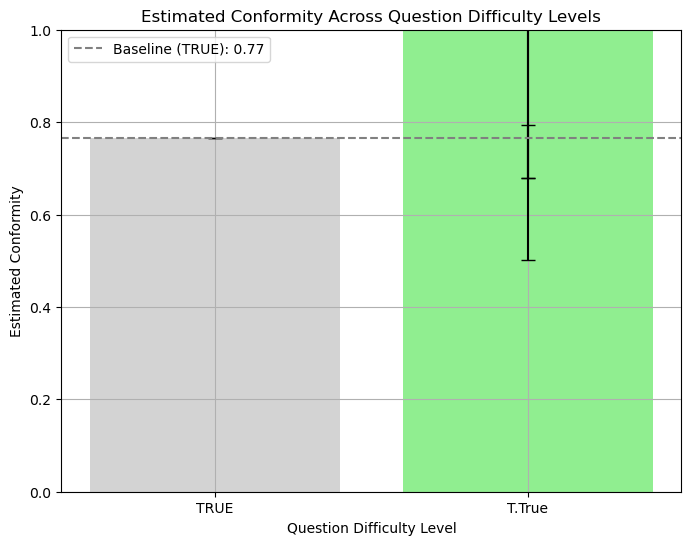

In [31]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Observed Conformity": "ALIGNMENT",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "IsCritical": "ISDECEPTION",
    "QDifficultyClass": "QDIFFCAT" # Assuming this is the category variable
})

# Filter data for all dissent cases
dissent_df = df[(df['QUESTION'].isin([1,2,3,4,5,6,7,8])) & (df['DISSENT'] == 1)]

# Fit the Mixed Linear Model with QDIFFCAT and ABILITY
model = mixedlm("ALIGNMENT ~ ISDECEPTION * QDIFFICULTY + ISDECEPTION * ABILITY + ISDECEPTION * CONDITION ", 
                dissent_df, 
                groups=dissent_df["SUBJECT"],
                re_formula="~1")

# Fit the model
result = model.fit()

# Print the summary of the model
print(result.summary())



# Extract the coefficients for plotting
coefs = result.params.filter(like="ISDECEPTION")

# Prepare data for plotting
levels = ['TRUE'] + [level.split('[')[1].split(']')[0] for level in coefs.index]
means = [result.params['Intercept']] + [result.params['Intercept'] + coef for coef in coefs]
errors = [0] + list(result.bse.filter(like="ISDECEPTION"))

# Plot the estimated means with error bars
plt.figure(figsize=(8, 6))
plt.bar(levels, means, yerr=errors, color=['lightgray', 'lightblue', 'lightgreen'], capsize=5)
plt.xlabel('Question Difficulty Level')
plt.ylabel('Estimated Conformity')
plt.title('Estimated Conformity Across Question Difficulty Levels')
plt.grid(True)
plt.ylim(0, 1)
plt.axhline(result.params['Intercept'], color='gray', linestyle='--', label=f'Baseline (TRUE): {result.params["Intercept"]:.2f}')
plt.legend()
plt.show()


## CONFORMITY ~ CONDITION +  QDIFFICULTY + ABILITY
## ALL QUESTIONS


## No differences 
## But Mariginally Less Conformity with the Uncertain Robot 


In [27]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Observed Conformity": "CONFORMITY",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Filter data for critical questions (questions 3 and 7) and dissent cases
dissent_df = df[(df['QUESTION'].isin([1,2,3,4,5,6,7,8])) & (df['DISSENT'] == 1)]

# Define the GLMM model with 'CONDITION' as a fixed effect and 'ABILITY' as a covariate
# 'SUBJECT' is included as a random effect to account for repeated measures
model = mixedlm("CONFORMITY ~ CONDITION +  QDIFFICULTY + ABILITY", 
                dissent_df, 
                groups=dissent_df["SUBJECT"],
                re_formula="~1")

# Fit the model
result = model.fit()

# Print the summary of the model to see if implausibility changes across groups for dissenters
print(result.summary())


          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: CONFORMITY
No. Observations:  139     Method:             REML      
No. Groups:        39      Scale:              0.1041    
Min. group size:   1       Log-Likelihood:     -55.0010  
Max. group size:   6       Converged:          Yes       
Mean group size:   3.6                                   
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.698    0.121  5.792 0.000  0.462  0.934
CONDITION[T.N] -0.082    0.100 -0.821 0.412 -0.278  0.114
CONDITION[T.U] -0.131    0.069 -1.888 0.059 -0.267  0.005
QDIFFICULTY     1.794    0.773  2.321 0.020  0.279  3.310
ABILITY        -0.191    0.472 -0.405 0.686 -1.116  0.734
Group Var       0.027    0.049                           



In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Observed Conformity": "CONFORMITY",
    "Ability Cat (3) ": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Filter data for critical questions (questions 3 and 7) and dissent cases
dissent_df = df[(df['QUESTION'].isin([1,2,3,4,5,6,7,8])) & (df['DISSENT'] == 1)]

# Define the GLMM model with 'CONDITION' as a fixed effect and 'ABILITY' as a covariate
# 'SUBJECT' is included as a random effect to account for repeated measures
model = mixedlm("CONFORMITY ~ CONDITION + ABILITY", 
                dissent_df, 
                groups=dissent_df["SUBJECT"],
                re_formula="~1")

# Fit the model
result = model.fit()

# Print the summary of the model to see if implausibility changes across groups for dissenters
print(result.summary())


           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  CONFORMITY
No. Observations:   139      Method:              REML      
No. Groups:         39       Scale:               0.1068    
Min. group size:    1        Log-Likelihood:      -61.0265  
Max. group size:    6        Converged:           Yes       
Mean group size:    3.6                                     
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept          0.915    0.088 10.418 0.000  0.743  1.087
CONDITION[T.N]    -0.061    0.096 -0.629 0.529 -0.249  0.128
CONDITION[T.U]    -0.126    0.070 -1.786 0.074 -0.264  0.012
ABILITY[T.LOW]     0.034    0.117  0.287 0.774 -0.196  0.263
ABILITY[T.MEDIUM] -0.049    0.102 -0.477 0.633 -0.249  0.152
Group Var          0.030    0.051                           



Descriptive Statistics:
               mean       std  count
CONDITION                           
C          0.895833  0.308709     48
N          0.851064  0.359875     47
U          0.772727  0.423915     44


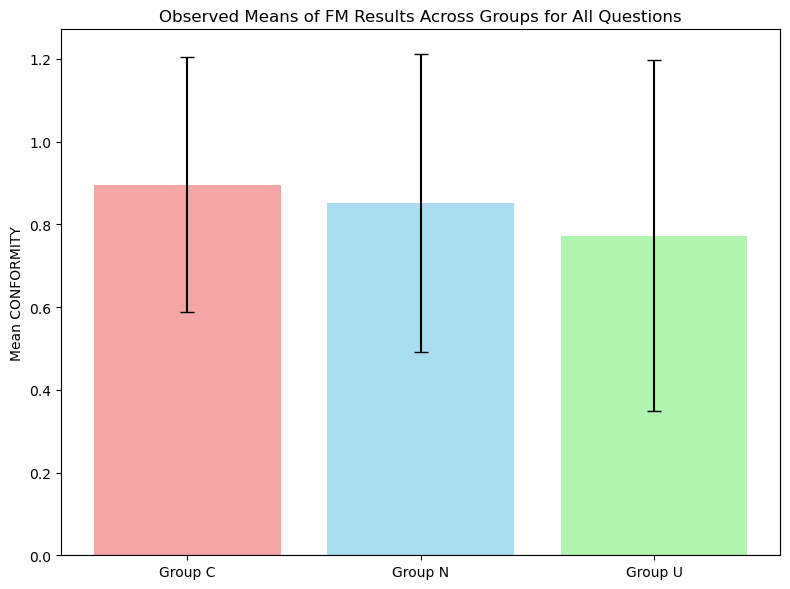


Model with Group N as Reference:

          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: CONFORMITY
No. Observations:  139     Method:             REML      
No. Groups:        39      Scale:              0.1074    
Min. group size:   1       Log-Likelihood:     -58.3264  
Max. group size:   6       Converged:          Yes       
Mean group size:   3.6                                   
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.847    0.068 12.506 0.000  0.715  0.980
CONDITION[T.C]  0.067    0.101  0.665 0.506 -0.131  0.266
CONDITION[T.U] -0.058    0.101 -0.569 0.569 -0.256  0.141
ABILITY        -0.162    0.480 -0.337 0.736 -1.103  0.779
Group Var       0.029    0.050                           


Model with Group U as Reference:

          Mixed Linear Model Regression Results
Model:             Mi

C:\Users\pablo\AppData\Local\Temp\ipykernel_8584\2242691513.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_critical_df['CONDITION'] = pd.Categorical(non_critical_df['CONDITION'], categories=['N', 'C', 'U'])
C:\Users\pablo\AppData\Local\Temp\ipykernel_8584\2242691513.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_critical_df['CONDITION'] = pd.Categorical(non_critical_df['CONDITION'], categories=['U', 'C', 'N'])


In [7]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Observed Conformity": "CONFORMITY",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "QDifficultyClass": "QDIFFCAT",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Filter data for non-critical questions (questions 1, 2, 5, 6) and dissent cases
non_critical_df = df[(df['QUESTION'].isin([1,2,3,4,5,6,7,8])) & (df['DISSENT'] == 1)]

# Calculate descriptive statistics for each group
descriptive_stats = non_critical_df.groupby('CONDITION')['CONFORMITY'].agg(['mean', 'std', 'count'])

# Display the descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

# Plotting the observed means with standard deviations
plt.figure(figsize=(8, 6))
plt.bar(descriptive_stats.index, descriptive_stats['mean'], yerr=descriptive_stats['std'], color=['lightcoral', 'skyblue', 'lightgreen'], capsize=5, alpha=0.7)
plt.ylabel('Mean CONFORMITY')
plt.title('Observed Means of FM Results Across Groups for All Questions')
plt.xticks(descriptive_stats.index, ['Group C', 'Group N', 'Group U'])
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

# Change the reference group to 'N' or 'U' and fit the model again
# To set 'N' as reference
non_critical_df['CONDITION'] = pd.Categorical(non_critical_df['CONDITION'], categories=['N', 'C', 'U'])
model_N_reference = mixedlm("CONFORMITY ~ CONDITION + ABILITY", 
                            non_critical_df, 
                            groups=non_critical_df["SUBJECT"],
                            re_formula="~1")

result_N_reference = model_N_reference.fit()
print("\nModel with Group N as Reference:\n")
print(result_N_reference.summary())

# To set 'U' as reference
non_critical_df['CONDITION'] = pd.Categorical(non_critical_df['CONDITION'], categories=['U', 'C', 'N'])
model_U_reference = mixedlm("CONFORMITY ~ CONDITION + ABILITY", 
                            non_critical_df, 
                            groups=non_critical_df["SUBJECT"],
                            re_formula="~1")

result_U_reference = model_U_reference.fit()
print("\nModel with Group U as Reference:\n")
print(result_U_reference.summary())


## Critical questions: no differences in the across conditions

In [32]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Final answer": "FINAL_ANSWER",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Filter data for critical questions (questions 3 and 7) and dissent cases
dissent_df = df[(df['QUESTION'].isin([3, 7])) & (df['DISSENT'] == 1)]

# Define the GLMM model with 'GROUP' as a fixed effect and 'ABILITY' as a covariate
# 'SUBJECT' is included as a random effect to account for repeated measures
model = mixedlm("FINAL_ANSWER ~ CONDITION + ABILITY + QDIFFICULTY", 
                dissent_df, 
                groups=dissent_df["SUBJECT"],
                re_formula="~1")

# Fit the model
result = model.fit()

# Print the summary of the model to see if implausibility changes across groups for dissenters
print(result.summary())


            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  FINAL_ANSWER
No. Observations:   45       Method:              REML        
No. Groups:         29       Scale:               0.1821      
Min. group size:    1        Log-Likelihood:      -21.5657    
Max. group size:    2        Converged:           Yes         
Mean group size:    1.6                                       
--------------------------------------------------------------
                Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
--------------------------------------------------------------
Intercept        13.685   12.703  1.077 0.281  -11.212  38.581
CONDITION[T.N]    0.011    0.192  0.055 0.956   -0.366   0.388
CONDITION[T.U]    0.210    0.149  1.410 0.159   -0.082   0.502
ABILITY          -0.451    0.824 -0.547 0.584   -2.066   1.164
QDIFFICULTY    -141.089  133.007 -1.061 0.289 -401.777 119.599
Group Var         0.012    0.120                              



Out of the 80 observations in the PM questions 3 and 7, there were 45 dissents. The outcome of those dissents (34 conformity cases) were not fundamentally different across groups.

There is no statistically significant difference in implausibility (final answer changes) across the three groups (N, C, U), even after accounting for the imbalance in students' abilities. This suggests that the robot's influence did not differ significantly between the groups when controlling for ability.

## Easy Non-Critical Questions (1,2,5,6): the more certain the robot, the more conformity 

In [34]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Final answer": "FINAL_ANSWER",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Filter data for critical questions (questions 3 and 7) and dissent cases
dissent_df = df[(df['QUESTION'].isin([1,2,5,6])) & (df['DISSENT'] == 1)]

# Define the GLMM model with 'GROUP' as a fixed effect and 'ABILITY' as a covariate
# 'SUBJECT' is included as a random effect to account for repeated measures
model = mixedlm("FINAL_ANSWER ~ CONDITION + ABILITY + QDIFFICULTY", 
                dissent_df, 
                groups=dissent_df["SUBJECT"],
                re_formula="~1")

# Fit the model
result = model.fit()

# Print the summary of the model to see if implausibility changes across groups for dissenters
print(result.summary())


          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: CONFORMITY
No. Observations:   55      Method:             REML      
No. Groups:         32      Scale:              0.0604    
Min. group size:    1       Log-Likelihood:     -17.0981  
Max. group size:    3       Converged:          Yes       
Mean group size:    1.7                                   
----------------------------------------------------------
               Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------
Intercept       1.083    1.556  0.696 0.486  -1.967  4.133
CONDITION[T.N] -0.256    0.149 -1.719 0.086  -0.547  0.036
CONDITION[T.U] -0.356    0.107 -3.333 0.001  -0.565 -0.147
ABILITY        -0.971    0.776 -1.250 0.211  -2.492  0.551
QDIFFICULTY     0.118   14.256  0.008 0.993 -27.824 28.060
Group Var       0.082    0.204                            



Descriptive Statistics:
               mean       std  count
CONDITION                           
C          0.944444  0.235702     18
N          0.826087  0.387553     23
U          0.714286  0.468807     14
          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: CONFORMITY
No. Observations:   55      Method:             REML      
No. Groups:         32      Scale:              0.0604    
Min. group size:    1       Log-Likelihood:     -17.0981  
Max. group size:    3       Converged:          Yes       
Mean group size:    1.7                                   
----------------------------------------------------------
               Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------
Intercept       1.083    1.556  0.696 0.486  -1.967  4.133
CONDITION[T.N] -0.256    0.149 -1.719 0.086  -0.547  0.036
CONDITION[T.U] -0.356    0.107 -3.333 0.001  -0.565 -0.147
ABILITY        -0.971    0.776 -1.2

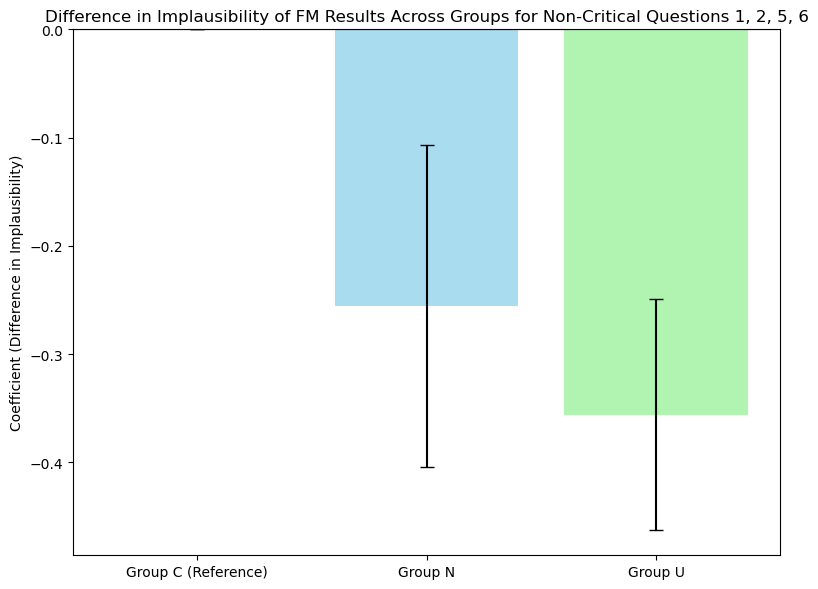

In [37]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Observed Conformity": "FINAL_ANSWER",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Observed Conformity": "CONFORMITY",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Filter data for non-critical questions (questions 1, 2, 5, 6) and dissent cases
non_critical_df = df[(df['QUESTION'].isin([1, 2, 5, 6])) & (df['DISSENT'] == 1)]

# Calculate descriptive statistics for each group
descriptive_stats = non_critical_df.groupby('CONDITION')['CONFORMITY'].agg(['mean', 'std', 'count'])

# Display the descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

# Define the GLMM model with 'GROUP' as a fixed effect and 'ABILITY' as a covariate
# 'SUBJECT' is included as a random effect to account for repeated measures
model = mixedlm("CONFORMITY ~ CONDITION + ABILITY", 
                non_critical_df, 
                groups=non_critical_df["SUBJECT"],
                re_formula="~1")

# Fit the model
result = model.fit()

# Print the summary of the model to see if implausibility changes across groups for dissenters
print(result.summary())

# Data for plotting based on the results
group_names = ['C', 'N', 'U']
coefficients = [0, result.params['CONDITION[T.N]'], result.params['CONDITION[T.U]']]  # 'C' is reference, so its effect is 0
std_err = [0, result.bse['CONDITION[T.N]'], result.bse['CONDITION[T.U]']]
labels = ['Group C (Reference)', 'Group N', 'Group U']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(group_names, coefficients, yerr=std_err, color=['lightcoral', 'skyblue', 'lightgreen'], capsize=5, alpha=0.7)
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel('Coefficient (Difference in Implausibility)')
plt.title('Difference in Implausibility of FM Results Across Groups for Non-Critical Questions 1, 2, 5, 6')
plt.xticks(group_names, labels)

# Show the plot
plt.tight_layout()
plt.show()


### Interpretation
The plot illustrates the difference in implausibility of final minitest (FM) results across groups "N" and "U" for non-critical questions (1, 2, 5, 6). The bars represent the coefficients indicating the change in implausibility compared to the reference group "C," with error bars showing the standard error.

Group N has a negative coefficient, suggesting a lower implausibility compared to group "C," but this difference is only marginally significant.
Group U shows a more significant reduction in implausibility, as indicated by a larger negative coefficient.
This visualization highlights that students in group "U" were less influenced by the robot compared to those in group "C," especially in the context of non-critical questions.


### The "difference in implausibility" 
The "difference in implausibility" refers to the change in the likelihood of implausible responses in the final minitest (FM) results across different groups ("N," "C," "U") compared to a reference group. In the context of the GLMM output, this is captured by the coefficients for each group (e.g., GROUP[T.N] and GROUP[T.U]).

### Metric Explanation:
The coefficients for GROUP[T.N] and GROUP[T.U] represent the estimated change in the final answer (FM) scores for groups "N" and "U," respectively, relative to the reference group "C."
A negative coefficient means that students in that group ("N" or "U") were less likely to provide implausible responses (i.e., responses that differ significantly from the expected probability of correctness) compared to those in group "C."
Conversely, a positive coefficient would indicate a higher likelihood of implausible responses compared to the reference group.

Descriptive Statistics:
               mean       std  count
CONDITION                           
C          0.944444  0.235702     18
N          0.826087  0.387553     23
U          0.714286  0.468807     14


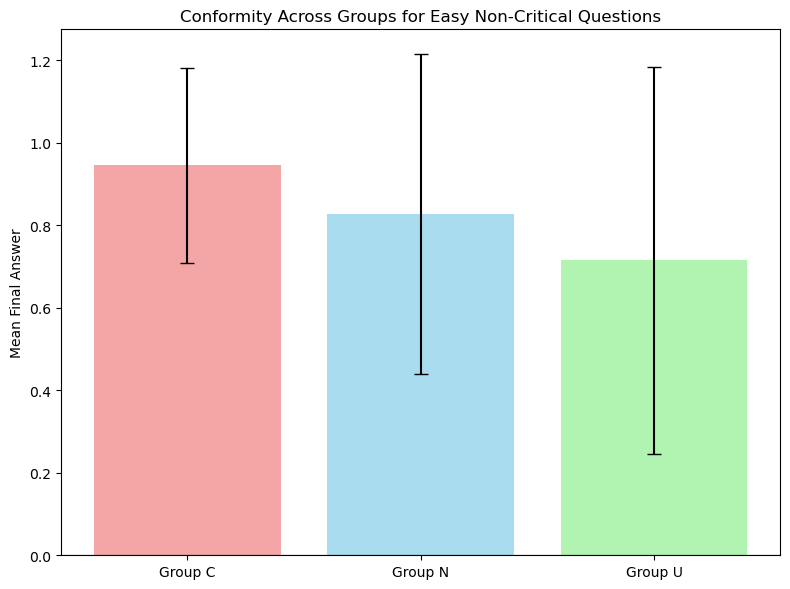


Model with Group N as Reference:

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: FINAL_ANSWER
No. Observations: 55      Method:             REML        
No. Groups:       32      Scale:              0.0583      
Min. group size:  1       Log-Likelihood:     -20.6580    
Max. group size:  3       Converged:          Yes         
Mean group size:  1.7                                     
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        0.840    0.096  8.767 0.000  0.653  1.028
CONDITION[T.C]   0.256    0.148  1.735 0.083 -0.033  0.546
CONDITION[T.U]  -0.101    0.151 -0.673 0.501 -0.396  0.194
ABILITY         -0.972    0.772 -1.259 0.208 -2.484  0.541
Group Var        0.082    0.203                           


Model with Group U as Reference:

          Mixed Linear Model Regression Results
Model: 

C:\Users\pablo\AppData\Local\Temp\ipykernel_8584\4271714390.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_critical_df['CONDITION'] = pd.Categorical(non_critical_df['CONDITION'], categories=['N', 'C', 'U'])
C:\Users\pablo\AppData\Local\Temp\ipykernel_8584\4271714390.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_critical_df['CONDITION'] = pd.Categorical(non_critical_df['CONDITION'], categories=['U', 'C', 'N'])


In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Final answer": "FINAL_ANSWER",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Filter data for non-critical questions (questions 1, 2, 5, 6) and dissent cases
non_critical_df = df[(df['QUESTION'].isin([1, 2, 5, 6])) & (df['DISSENT'] == 1)]

# Calculate descriptive statistics for each group
descriptive_stats = non_critical_df.groupby('CONDITION')['FINAL_ANSWER'].agg(['mean', 'std', 'count'])

# Display the descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

# Plotting the observed means with standard deviations
plt.figure(figsize=(8, 6))
plt.bar(descriptive_stats.index, descriptive_stats['mean'], yerr=descriptive_stats['std'], color=['lightcoral', 'skyblue', 'lightgreen'], capsize=5, alpha=0.7)
plt.ylabel('Mean Final Answer')
plt.title('Conformity Across Groups for Easy Non-Critical Questions')
plt.xticks(descriptive_stats.index, ['Group C', 'Group N', 'Group U'])
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

# Change the reference group to 'N' or 'U' and fit the model again
# To set 'N' as reference
non_critical_df['CONDITION'] = pd.Categorical(non_critical_df['CONDITION'], categories=['N', 'C', 'U'])
model_N_reference = mixedlm("FINAL_ANSWER ~ CONDITION + ABILITY", 
                            non_critical_df, 
                            groups=non_critical_df["SUBJECT"],
                            re_formula="~1")

result_N_reference = model_N_reference.fit()
print("\nModel with Group N as Reference:\n")
print(result_N_reference.summary())

# To set 'U' as reference
non_critical_df['CONDITION'] = pd.Categorical(non_critical_df['CONDITION'], categories=['U', 'C', 'N'])
model_U_reference = mixedlm("FINAL_ANSWER ~ CONDITION + ABILITY", 
                            non_critical_df, 
                            groups=non_critical_df["SUBJECT"],
                            re_formula="~1")

result_U_reference = model_U_reference.fit()
print("\nModel with Group U as Reference:\n")
print(result_U_reference.summary())


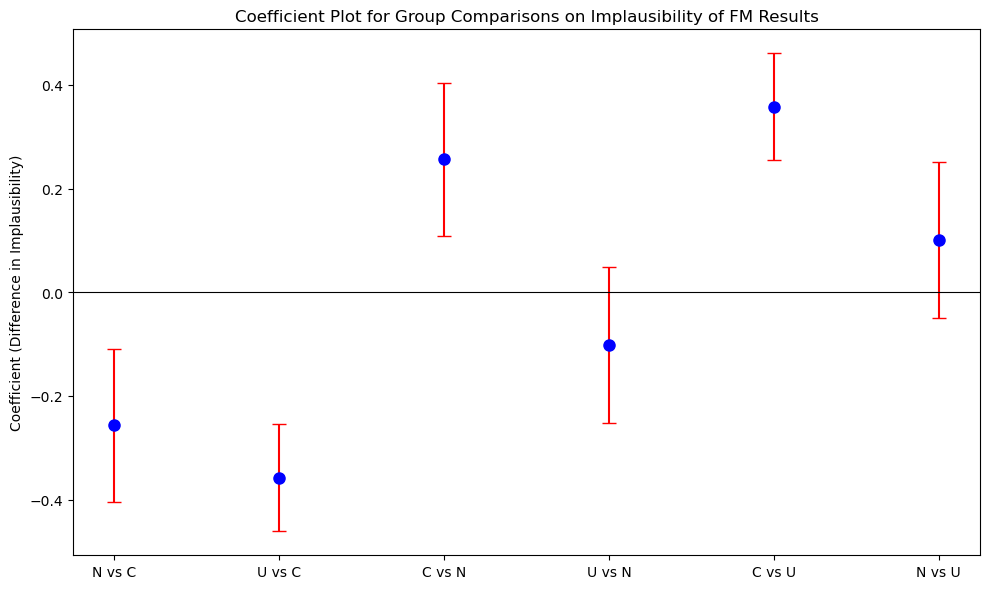

In [12]:
import matplotlib.pyplot as plt

# Data for coefficient plot
coefficients = [
    result.params['CONDITION[T.N]'], 
    result.params['CONDITION[T.U]'], 
    result_N_reference.params['CONDITION[T.C]'],
    result_N_reference.params['CONDITION[T.U]'], 
    result_U_reference.params['CONDITION[T.C]'], 
    result_U_reference.params['CONDITION[T.N]']
]
errors = [
    result.bse['CONDITION[T.N]'], 
    result.bse['CONDITION[T.U]'], 
    result_N_reference.bse['CONDITION[T.C]'],
    result_N_reference.bse['CONDITION[T.U]'], 
    result_U_reference.bse['CONDITION[T.C]'], 
    result_U_reference.bse['CONDITION[T.N]']
]
labels = ['N vs C', 'U vs C', 'C vs N', 'U vs N', 'C vs U', 'N vs U']

# Plotting the coefficient plot
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(coefficients)), coefficients, yerr=errors, fmt='o', color='blue', ecolor='red', capsize=5, markersize=8)
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(range(len(coefficients)), labels)
plt.ylabel('Coefficient (Difference in Implausibility)')
plt.title('Coefficient Plot for Group Comparisons on Implausibility of FM Results')
plt.tight_layout()
plt.show()


## Hard Non-Critical Questions (4,8): No differences across conditions

In [13]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Final answer": "FINAL_ANSWER",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Filter data for critical questions (questions 3 and 7) and dissent cases
dissent_df = df[(df['QUESTION'].isin([4,8])) & (df['DISSENT'] == 1)]

# Define the GLMM model with 'GROUP' as a fixed effect and 'ABILITY' as a covariate
# 'SUBJECT' is included as a random effect to account for repeated measures
model = mixedlm("FINAL_ANSWER ~ CONDITION + ABILITY", 
                dissent_df, 
                groups=dissent_df["SUBJECT"],
                re_formula="~1")

# Fit the model
result = model.fit()

# Print the summary of the model to see if implausibility changes across groups for dissenters
print(result.summary())


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: FINAL_ANSWER
No. Observations: 39      Method:             REML        
No. Groups:       31      Scale:              0.0000      
Min. group size:  1       Log-Likelihood:     67.0589     
Max. group size:  2       Converged:          Yes         
Mean group size:  1.3                                     
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        0.959    0.074 13.052 0.000  0.815  1.104
CONDITION[T.N]  -0.049    0.097 -0.503 0.615 -0.239  0.141
CONDITION[T.U]   0.000    0.000  0.000 1.000 -0.000  0.000
ABILITY         -0.092    0.510 -0.180 0.857 -1.093  0.908
Group Var        0.053 2900.742                           



## Conformity: no differences overall in the across conditions
## 

In [14]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Observed Conformity": "CONFORMITY",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Filter data for critical questions (questions 3 and 7) and dissent cases
dissent_df = df[(df['QUESTION'].isin([1,2,3,4,5,6,7,8])) & (df['DISSENT'] == 1)]

# Define the GLMM model with 'GROUP' as a fixed effect and 'ABILITY' as a covariate
# 'SUBJECT' is included as a random effect to account for repeated measures
model = mixedlm("CONFORMITY ~ CONDITION + ABILITY", 
                dissent_df, 
                groups=dissent_df["SUBJECT"],
                re_formula="~1")

# Fit the model
result = model.fit()

# Print the summary of the model to see if implausibility changes across groups for dissenters
print(result.summary())


          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: CONFORMITY
No. Observations:  139     Method:             REML      
No. Groups:        39      Scale:              0.1074    
Min. group size:   1       Log-Likelihood:     -58.3264  
Max. group size:   6       Converged:          Yes       
Mean group size:   3.6                                   
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.915    0.078 11.795 0.000  0.763  1.067
CONDITION[T.N] -0.067    0.101 -0.665 0.506 -0.266  0.131
CONDITION[T.U] -0.125    0.070 -1.774 0.076 -0.263  0.013
ABILITY        -0.162    0.480 -0.337 0.736 -1.103  0.779
Group Var       0.029    0.050                           



## Do correctness probabilities predict Preliminary Results?

#### Per group?

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Final answer": "FINAL_ANSWER",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Filter data for relevant questions (e.g., questions 1, 2, 5, 6)
relevant_df = df[df['QUESTION'].isin([1, 2, 5, 6])]

# Define the GLMM model with 'Correctness Probability' as a predictor
# 'GROUP' and 'ABILITY' are included as covariates
# 'SUBJECT' is included as a random effect
model = mixedlm("PRELIMINARY_ANSWER ~ CORRECTNESS_PROB + CONDITION + ABILITY", 
                relevant_df, 
                groups=relevant_df["SUBJECT"],
                re_formula="~1")

# Fit the model
result = model.fit()

# Print the summary of the model to see if correctness probability predicts preliminary answers
print(result.summary())


C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: PRELIMINARY_ANSWER
No. Observations: 160     Method:             REML              
No. Groups:       40      Scale:              0.2212            
Min. group size:  4       Log-Likelihood:     -108.7010         
Max. group size:  4       Converged:          Yes               
Mean group size:  4.0                                           
-----------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------
Intercept           0.493     0.836  0.590  0.555  -1.145   2.131
CONDITION[T.N]      0.017     0.103  0.162  0.871  -0.184   0.218
CONDITION[T.U]      0.077     0.092  0.830  0.406  -0.104   0.258
CORRECTNESS_PROB    0.171     2.001  0.085  0.932  -3.750   4.092
ABILITY             0.813     0.621  1.311  0.190  -0.403   2.030
Group Var           0.003     0

C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


##### Probabilities do not predict outcomes in PM.


#### All questions, all students. No groups.

In [16]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Final answer": "FINAL_ANSWER",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Filter data for relevant questions (e.g., questions all)
relevant_df = df[df['QUESTION'].isin([4])]

# Define the GLMM model with 'Correctness Probability' as a predictor, excluding group effects
model_cp_only = mixedlm("PRELIMINARY_ANSWER ~ CORRECTNESS_PROB", 
                        relevant_df, 
                        groups=relevant_df["SUBJECT"],
                        re_formula="~1")

# Fit the model
result_cp_only = model_cp_only.fit()

# Print the summary of the model to see if correctness probability predicts preliminary answers
print("GLMM Results with Correctness Probability Only:")
print(result_cp_only.summary())

# Define the GLMM model with 'Correctness Probability' and 'Ability' as predictors, excluding group effects
model_cp_ability = mixedlm("PRELIMINARY_ANSWER ~ CORRECTNESS_PROB + ABILITY", 
                           relevant_df, 
                           groups=relevant_df["SUBJECT"],
                           re_formula="~1")

# Fit the model
result_cp_ability = model_cp_ability.fit()

# Print the summary of the model to see if correctness probability and ability together predict preliminary answers
print("\nGLMM Results with Correctness Probability and Ability:")
print(result_cp_ability.summary())


GLMM Results with Correctness Probability Only:
             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: PRELIMINARY_ANSWER
No. Observations: 40      Method:             REML              
No. Groups:       40      Scale:              0.1278            
Min. group size:  1       Log-Likelihood:     -26.1488          
Max. group size:  1       Converged:          Yes               
Mean group size:  1.0                                           
----------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept            -3.594    0.298 -12.048 0.000 -4.178 -3.009
CORRECTNESS_PROB     10.041    0.945  10.628 0.000  8.189 11.893
Group Var             0.128                                     


GLMM Results with Correctness Probability and Ability:
               Mixed Linear Model Regression Results
Model:     

C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


##### Probabilities do not predict outcomes in PM. With or without abilities

#### All questions one by one, all students. No groups.

In [17]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Final answer": "FINAL_ANSWER",
    "Ability [-3, 3]": "ABILITY",
    "Ability Cat (3)": "ABILITY_CAT",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Define a function to analyze the prediction of preliminary answers by correctness probabilities for a specific question
def analyze_question_prediction(question_num):
    # Filter the data for the specific question
    question_df = df[df['QUESTION'] == question_num]
    
    # Check if there is sufficient data for the question
    if question_df.empty:
        print(f"No data found for Question {question_num}.")
        return
    
    # Define the GLMM model with 'Correctness Probability' as a predictor
    model_cp = mixedlm("PRELIMINARY_ANSWER ~ CORRECTNESS_PROB", 
                       question_df, 
                       groups=question_df["SUBJECT"],
                       re_formula="~1")
    
    # Fit the model
    result_cp = model_cp.fit()

    # Print the summary of the model to see if correctness probability predicts preliminary answers for the specific question
    print(f"GLMM Results for Question {question_num}:")
    print(result_cp.summary())

# Example usage: Analyze prediction for a specific question, e.g., Question 1
analyze_question_prediction(1)

analyze_question_prediction(2)

analyze_question_prediction(3)

analyze_question_prediction(4)

analyze_question_prediction(5)

analyze_question_prediction(6)

analyze_question_prediction(7)

analyze_question_prediction(8)


C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\regressio

GLMM Results for Question 1:
             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: PRELIMINARY_ANSWER
No. Observations: 40      Method:             REML              
No. Groups:       40      Scale:              0.1100            
Min. group size:  1       Log-Likelihood:     -24.8166          
Max. group size:  1       Converged:          Yes               
Mean group size:  1.0                                           
-----------------------------------------------------------------
                  Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------------
Intercept         -0.032     0.066  -0.487  0.627  -0.163   0.098
CORRECTNESS_PROB   1.750     0.018  95.402  0.000   1.714   1.786
Group Var          0.110                                         

GLMM Results for Question 2:
             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: PRELIMI

##### Probabilities do not predict outcomes in PM. With or without abilities

#### All FINAL questions one by one.  

In [18]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Final answer": "FINAL_ANSWER",
    "Ability [-3, 3]": "ABILITY",
    "Ability Cat (3)": "ABILITY_CAT",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Define a function to analyze the prediction of final answers by correctness probabilities for a specific question
def analyze_question_final_prediction(question_num):
    # Filter the data for the specific question
    question_df = df[df['QUESTION'] == question_num]
    
    # Check if there is sufficient data for the question
    if question_df.empty:
        print(f"No data found for Question {question_num}.")
        return
    
    # Define the GLMM model with 'Correctness Probability' as a predictor for the final answer
    model_cp_final = mixedlm("FINAL_ANSWER ~ CORRECTNESS_PROB", 
                             question_df, 
                             groups=question_df["SUBJECT"],
                             re_formula="~1")
    
    # Fit the model
    result_cp_final = model_cp_final.fit()

    # Print the summary of the model to see if correctness probability predicts final answers for the specific question
    print(f"GLMM Results for Question {question_num} (Final Results):")
    print(result_cp_final.summary())

# Example usage: Analyze prediction for a specific question, e.g., Question 1

analyze_question_final_prediction(1)

analyze_question_final_prediction(2)

analyze_question_final_prediction(3)

analyze_question_final_prediction(4)

analyze_question_final_prediction(5)

analyze_question_final_prediction(6)

analyze_question_final_prediction(7)

analyze_question_final_prediction(8)


GLMM Results for Question 1 (Final Results):
           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: FINAL_ANSWER
No. Observations:  40      Method:             REML        
No. Groups:        40      Scale:              0.0359      
Min. group size:   1       Log-Likelihood:     -3.5639     
Max. group size:   1       Converged:          Yes         
Mean group size:   1.0                                     
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         1.694    0.126 13.438 0.000  1.447  1.941
CORRECTNESS_PROB -1.838    0.200 -9.176 0.000 -2.231 -1.446
Group Var         0.036                                    

GLMM Results for Question 2 (Final Results):
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: FINAL_ANSWER
No. Observations: 40      Method:

C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\regressio

# Plausibility of changes

In [19]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the updated dataset with new column header and correct file path
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Final answer": "FINAL_ANSWER",
    "Ability [-3, 3]": "ABILITY",
    "Ability Cat (3)": "ABILITY_CAT",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "PLAUSIBLE_CHANGE": "PLAUSIBLE_CHANGE",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Filter data for critical questions (questions 3 and 7) and dissent cases
dissent_df = df[(df['QUESTION'].isin([1,2,3,4,5,6,7,8])) & (df['DISSENT'] == 1)]

# Define the GLMM model with 'CONDITION' as a fixed effect and 'ABILITY' as a covariate
# 'SUBJECT' is included as a random effect to account for repeated measures
model = mixedlm("PLAUSIBLE_CHANGE ~ ABILITY", 
                dissent_df, 
                groups=dissent_df["SUBJECT"],
                re_formula="~1")

# Fit the model
result = model.fit()

# Print the summary of the model to see the effect of conformity heatmap and ability on final answers
print("GLMM Results with Implausible change and Ability:")

# Print the summary of the model to see if implausibility changes across groups for dissenters
print(result.summary())



GLMM Results with Implausible change and Ability:
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: PLAUSIBLE_CHANGE
No. Observations: 139     Method:             REML            
No. Groups:       39      Scale:              0.0277          
Min. group size:  1       Log-Likelihood:     40.7292         
Max. group size:  6       Converged:          Yes             
Mean group size:  3.6                                         
----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|   [0.025   0.975]
----------------------------------------------------------------
Intercept     0.113      0.022   5.069   0.000    0.069    0.157
ABILITY       0.027      0.192   0.141   0.888   -0.349    0.403
Group Var     0.004      0.018                                  



C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [20]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the updated dataset with new column header and correct file path
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Final answer": "FINAL_ANSWER",
    "Ability [-3, 3]": "ABILITY",
    "Ability Cat (3)": "ABILITY_CAT",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "PLAUSIBLE_CHANGE": "PLAUSIBLE_CHANGE",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Filter data for critical questions (questions 3 and 7) and dissent cases
dissent_df = df[(df['QUESTION'].isin([1,2,3,4,5,6,7,8])) & (df['DISSENT'] == 1)]

# Define the GLMM model with 'CONDITION' as a fixed effect and 'ABILITY' as a covariate
# 'SUBJECT' is included as a random effect to account for repeated measures
model = mixedlm("PLAUSIBLE_CHANGE ~ CONDITION + ABILITY", 
                dissent_df, 
                groups=dissent_df["SUBJECT"],
                re_formula="~1")

# Fit the model
result = model.fit()

# Print the summary of the model to see the effect of conformity heatmap and ability on final answers
print("GLMM Results with Implausible change and Ability:")

# Print the summary of the model to see if implausibility changes across groups for dissenters
print(result.summary())



GLMM Results with Implausible change and Ability:
            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: PLAUSIBLE_CHANGE
No. Observations: 139     Method:             REML            
No. Groups:       39      Scale:              0.0279          
Min. group size:  1       Log-Likelihood:     36.4531         
Max. group size:  6       Converged:          Yes             
Mean group size:  3.6                                         
---------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept        0.126     0.036   3.470  0.001   0.055   0.197
CONDITION[T.N]  -0.030     0.047  -0.637  0.524  -0.122   0.062
CONDITION[T.U]   0.010     0.036   0.279  0.780  -0.060   0.080
ABILITY         -0.057     0.221  -0.257  0.797  -0.489   0.376
Group Var        0.004     0.019                               



C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [21]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Final answer": "FINAL_ANSWER",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "PLAUSIBLE_CHANGE": "PLAUSIBLE_CHANGE",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Filter data for critical questions (questions 3 and 7) and dissent cases
dissent_df = df[(df['QUESTION'].isin([3, 7])) & (df['DISSENT'] == 1)]

# Define the GLMM model with 'CONDITION' as a fixed effect and 'ABILITY' as a covariate
# 'SUBJECT' is included as a random effect to account for repeated measures
model = mixedlm("PLAUSIBLE_CHANGE ~ CONDITION + ABILITY", 
                dissent_df, 
                groups=dissent_df["SUBJECT"],
                re_formula="~1")

# Fit the model
result = model.fit()

# Print the summary of the model to see if implausibility changes across groups for dissenters
print(result.summary())


            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: PLAUSIBLE_CHANGE
No. Observations: 45      Method:             REML            
No. Groups:       29      Scale:              0.0012          
Min. group size:  1       Log-Likelihood:     25.9720         
Max. group size:  2       Converged:          Yes             
Mean group size:  1.6                                         
---------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept        0.181     0.063   2.877  0.004   0.058   0.305
CONDITION[T.N]   0.052     0.093   0.566  0.572  -0.129   0.234
CONDITION[T.U]  -0.008     0.014  -0.578  0.563  -0.035   0.019
ABILITY         -0.066     0.428  -0.155  0.877  -0.905   0.773
Group Var        0.038     0.507                               



In [22]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Final answer": "FINAL_ANSWER",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "PLAUSIBLE_CHANGE": "PLAUSIBLE_CHANGE",
    "Implausible Answer": "IMPLAUSIBLE",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Filter data for critical questions (questions 3 and 7) and dissent cases
dissent_df = df[(df['QUESTION'].isin([1,2,5,6])) & (df['DISSENT'] == 1)]
#dissent_df = df[(df['QUESTION'].isin([1,2,5,6])) & (df['DISSENT'] == 1) & (df['IMPLAUSIBLE'] == True)]

# Define the GLMM model with 'CONDITION' as a fixed effect and 'ABILITY' as a covariate
# 'SUBJECT' is included as a random effect to account for repeated measures
dissent_df['CONDITION'] = pd.Categorical(dissent_df['CONDITION'], categories=['N', 'C', 'U'])
model_N_reference = mixedlm("PLAUSIBLE_CHANGE ~ CONDITION + ABILITY", 
                            dissent_df, 
                            groups=dissent_df["SUBJECT"],
                            re_formula="~1")

# Fit the model
result = model.fit()

# Print the summary of the model to see if implausibility changes across groups for dissenters
print(dissent_df)
print(result.summary())


     SUBJECT Program  Group  ABILITY Ability Cat (3)   \
1          1     NA2      1   0.2411             HIGH   
8          2     NA2      2   0.0467           MEDIUM   
12         2     NA2      2   0.0467           MEDIUM   
20         3     NA2      3   0.0725           MEDIUM   
24         4     NA2      3   0.0500           MEDIUM   
32         7     NA2      1   0.0483           MEDIUM   
36         7     NA2      1   0.0483           MEDIUM   
37         7     NA2      1   0.0483           MEDIUM   
45         8     EL1      1  -0.0799              LOW   
56        10     EL1      2   0.0218              LOW   
60        10     EL1      2   0.0218              LOW   
61        10     EL1      2   0.0218              LOW   
73        13     EL1      1   0.0299           MEDIUM   
76        13     EL1      1   0.0299           MEDIUM   
77        13     EL1      1   0.0299           MEDIUM   
81        14     EL1      3   0.1773             HIGH   
85        14     EL1      3   0

C:\Users\pablo\AppData\Local\Temp\ipykernel_8584\1500534779.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dissent_df['CONDITION'] = pd.Categorical(dissent_df['CONDITION'], categories=['N', 'C', 'U'])


In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Final answer": "FINAL_ANSWER",
    "Ability [-3, 3]": "ABILITY",
    "Loose Condition": "CONDITION",
    "Dissent": "DISSENT",
    "PLAUSIBLE_CHANGE": "PLAUSIBLE_CHANGE",
    "QDifficulty": "QDIFFICULTY",
    "IsFirst4": "FIRST4",
    "Group": "GROUP"    
})

# Filter data for critical questions (questions 3 and 7) and dissent cases
dissent_df = df[(df['QUESTION'].isin([4,8])) & (df['DISSENT'] == 1)]

# Define the GLMM model with 'CONDITION' as a fixed effect and 'ABILITY' as a covariate
# 'SUBJECT' is included as a random effect to account for repeated measures
dissent_df['CONDITION'] = pd.Categorical(dissent_df['CONDITION'], categories=['N', 'C', 'U'])
model_N_reference = mixedlm("PLAUSIBLE_CHANGE ~ CONDITION + ABILITY", 
                            dissent_df, 
                            groups=dissent_df["SUBJECT"],
                            re_formula="~1")

# Fit the model
result = model.fit()
print(dissent_df)
# Print the summary of the model to see if implausibility changes across groups for dissenters
print(result.summary())


     SUBJECT Program  Group  ABILITY Ability Cat (3)   \
3          1     NA2      1   0.2411             HIGH   
19         3     NA2      3   0.0725           MEDIUM   
27         4     NA2      3   0.0500           MEDIUM   
39         7     NA2      1   0.0483           MEDIUM   
43         8     EL1      1  -0.0799              LOW   
47         8     EL1      1  -0.0799              LOW   
59        10     EL1      2   0.0218              LOW   
75        13     EL1      1   0.0299           MEDIUM   
79        13     EL1      1   0.0299           MEDIUM   
83        14     EL1      3   0.1773             HIGH   
91        15     EL1      3   0.0993           MEDIUM   
95        15     EL1      3   0.0993           MEDIUM   
103       16     EL1      1   0.0250           MEDIUM   
119       18     NA3      2   0.0880           MEDIUM   
123       19     NA3      3   0.1990             HIGH   
127       19     NA3      3   0.1990             HIGH   
135       20     NA3      1   0

C:\Users\pablo\AppData\Local\Temp\ipykernel_8584\2253531738.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dissent_df['CONDITION'] = pd.Categorical(dissent_df['CONDITION'], categories=['N', 'C', 'U'])
